<a href="https://colab.research.google.com/github/Laurahg22/Trabajo-analitica-RH/blob/main/c_exploracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importe de librerías


In [ ]:
#### Cargar paquetes siempre al inicio
import pandas as pd ### para manejo de datos
import sqlite3 as sql #### para bases de datos sql
import matplotlib as mpl ## gráficos
import matplotlib.pyplot as plt ### gráficos
import seaborn as sns
from pandas.plotting import scatter_matrix  ## para matriz de correlaciones
from sklearn import tree ###para ajustar arboles de decisión
from sklearn.tree import export_text ## para exportar reglas del árbol
from sklearn.preprocessing import LabelEncoder
import sys ## saber ruta de la que carga paquetes
import matplotlib.pyplot as plt #para visualización
import joblib  ### para guardar modelos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
###Ruta directorio qué tiene paquetes
sys.path
sys.path.append('/content/drive/MyDrive/trabajo/Trabajo-analitica-RH') ## este comanda agrega una ruta

In [ ]:
import a_funciones as funciones ### archivo de funciones propias

In [ ]:
# Configurar la opción para mostrar todas las columnas completas
pd.set_option('display.max_columns', None)

#Data 2016

In [ ]:
df2016=pd.read_csv('https://raw.githubusercontent.com/Laurahg22/Trabajo-analitica-RH/main/data/df_2016') #lectura de datos
df2016

,index,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,InfoDate,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementDate,retirementType,resignationReason,Attrition:1,retirementDate:1,retirementType:1,resignationReason:1
0,4410,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,2016-12-31 00:00:00,3.0,4.0,2.0,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4411,31,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,2016-12-31 00:00:00,3.0,2.0,4.0,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4412,32,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,2016-12-31 00:00:00,2.0,2.0,1.0,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4413,38,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,2016-12-31 00:00:00,4.0,4.0,3.0,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4414,32,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,2016-12-31 00:00:00,4.0,1.0,3.0,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,8815,42,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,Research Scientist,Single,60290,3.0,17,1,10.0,5,3,0,2,2016-12-31 00:00:00,4.0,1.0,3.0,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4406,8816,29,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.0,2,3,0,2,2016-12-31 00:00:00,4.0,4.0,3.0,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4407,8817,25,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,Sales Executive,Married,37020,0.0,20,0,5.0,4,4,1,2,2016-12-31 00:00:00,1.0,3.0,3.0,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4408,8818,42,Travel_Rarely,Sales,18,2,Medical,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,14,1,10.0,2,9,7,8,2016-12-31 00:00:00,4.0,1.0,3.0,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2016.info() #ver información de la data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  PercentSalaryHike       

In [ ]:
# Identificar si hay datos duplicados
display(df2016[df2016.duplicated(keep='last')])
display(df2016[df2016.duplicated(keep='first')])

,index,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,InfoDate,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementDate,retirementType,resignationReason,Attrition:1,retirementDate:1,retirementType:1,resignationReason:1


,index,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,InfoDate,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementDate,retirementType,resignationReason,Attrition:1,retirementDate:1,retirementType:1,resignationReason:1


In [ ]:
#Eliminar variables no necesarias
df2016 = df2016.drop(['index', 'InfoDate','Attrition', 'retirementDate','retirementType','resignationReason','Attrition:1', 'retirementDate:1','retirementType:1','resignationReason:1'], axis=1)


Tras el análisis realizado, se procede a eliminar ciertas variables duplicadas y otras que no son necesarias de la base de datos creada a partir de los registros del año 2016. Esta depuración de variables se realiza con el objetivo de optimizar la base de datos para el análisis posterior, eliminando redundancias y reduciendo la complejidad del conjunto de datos.

In [ ]:
def imp_datos (df, variables):
    for variable in variables:
        # Calcula la moda de la variable
        moda = df[variable].mode()[0]  # Selecciona el primer valor de la moda en caso de que haya múltiples modas
        # Imputa los valores nulos con la moda
        df[variable].fillna(moda, inplace=True)
        # Imprime información sobre los valores nulos imputados
        nulos_imputados = df[variable].isnull().sum()
    # Devuelve el DataFrame modificado
    return df

#Data 2015

In [ ]:
df2015=pd.read_csv('https://raw.githubusercontent.com/Laurahg22/Trabajo-analitica-RH/main/data/df_2015') #lectura de datos
df2015

,index,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,InfoDate,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementDate,retirementType,resignationReason
0,0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,2015-12-31 00:00:00,3.0,4.0,2.0,3,3,NaN,NaN,NaN,NaN
1,1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,2015-12-31 00:00:00,3.0,2.0,4.0,2,4,Yes,2016-10-15 00:00:00,Resignation,Others
2,2,32,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,2015-12-31 00:00:00,2.0,2.0,1.0,3,3,NaN,NaN,NaN,NaN
3,3,38,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,2015-12-31 00:00:00,4.0,4.0,3.0,2,3,NaN,NaN,NaN,NaN
4,4,32,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,2015-12-31 00:00:00,4.0,1.0,3.0,3,3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4405,42,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,Research Scientist,Single,60290,3.0,17,1,10.0,5,3,0,2,2015-12-31 00:00:00,4.0,1.0,3.0,3,3,NaN,NaN,NaN,NaN
4406,4406,29,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.0,2,3,0,2,2015-12-31 00:00:00,4.0,4.0,3.0,2,3,NaN,NaN,NaN,NaN
4407,4407,25,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,Sales Executive,Married,37020,0.0,20,0,5.0,4,4,1,2,2015-12-31 00:00:00,1.0,3.0,3.0,3,4,NaN,NaN,NaN,NaN
4408,4408,42,Travel_Rarely,Sales,18,2,Medical,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,14,1,10.0,2,9,7,8,2015-12-31 00:00:00,4.0,1.0,3.0,2,3,NaN,NaN,NaN,NaN


In [ ]:
df2015.info() #ver información de la data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  PercentSalaryHike       

In [ ]:
# Identificar si hay datos duplicados
display(df2015[df2015.duplicated(keep='last')])
display(df2015[df2015.duplicated(keep='first')])

,index,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,InfoDate,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementDate,retirementType,resignationReason


,index,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,InfoDate,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementDate,retirementType,resignationReason


In [ ]:
# llenar nulos de la variable respuesta
condicion = (df2015['retirementType'] == 'fired') | (pd.isnull(df2015['retirementType']))
df2015.loc[condicion, 'Attrition'] = 'No'

In [ ]:
# eliminar variables que no se necesitan
df2015 = df2015.drop(['index', 'EmployeeID', 'InfoDate', 'retirementDate','retirementType','resignationReason'], axis=1)

In [ ]:
# imputar datos nulos para NumCompaniesWorked, TotalWorkingYears, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance
df2015 = imp_datos(df2015, ['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'])

In [ ]:
#Observar s existen nulos
df2015.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
Attrition                  0
dtype: int64


Para preparar la base de datos del año 2015 para su uso en el entrenamiento del modelo, se llevan a cabo una serie de modificaciones. Estas incluyen la eliminación de variables no necesarias, la imputación de valores nulos y la verificación de la presencia de valores duplicados en las variables. Estos cambios se realizan con el fin de asegurar la integridad y calidad de los datos antes de proceder con el entrenamiento del modelo.

## Exploración de variables categóricas

In [ ]:
# Seleccionar variables que analizaremos como categoricas
var_cat = pd.DataFrame(df2015[['BusinessTravel','Department','Education','EducationField','Gender','JobLevel','JobRole',
                               'MaritalStatus','StockOptionLevel','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance',
                               'JobInvolvement','PerformanceRating']].astype(object))

In [ ]:
#resumen de las variables categoricas para observar el balanceo de las categoricas
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('##########################################')
    if plot:
        plt.figure(figsize=(12,6))
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

cat_cols = [col for col in var_cat.columns if var_cat[col].dtypes == "O"]
for col in cat_cols:
    cat_summary(var_cat, col, plot=False)

                   BusinessTravel      Ratio
Travel_Rarely                3129  70.952381
Travel_Frequently             831  18.843537
Non-Travel                    450  10.204082
##########################################
                        Department      Ratio
Research & Development        2883  65.374150
Sales                         1338  30.340136
Human Resources                189   4.285714
##########################################
   Education      Ratio
3       1716  38.911565
4       1194  27.074830
2        846  19.183673
1        510  11.564626
5        144   3.265306
##########################################
                  EducationField      Ratio
Life Sciences               1818  41.224490
Medical                     1392  31.564626
Marketing                    477  10.816327
Technical Degree             396   8.979592
Other                        246   5.578231
Human Resources               81   1.836735
##########################################
        Gend


Este análisis ofrece una visión exhaustiva de las características de los empleados, incluyendo sus patrones de viaje de negocios, departamento de trabajo, nivel educativo, género, estado civil y niveles de satisfacción laboral. Destaca que la mayoría de los empleados viajan raramente por negocios, trabajan en el departamento de Investigación y Desarrollo, tienen un nivel educativo de 3 o 4, y provienen principalmente de campos como Ciencias de la Vida y Medicina. Además, muestra una ligera mayoría de empleados masculinos, con una mayoría casada. En cuanto a los roles laborales, los más comunes son ejecutivo de ventas, científico investigador y técnico de laboratorio. Los niveles de satisfacción laboral y equilibrio entre trabajo y vida personal se sitúan mayormente en niveles intermedios.

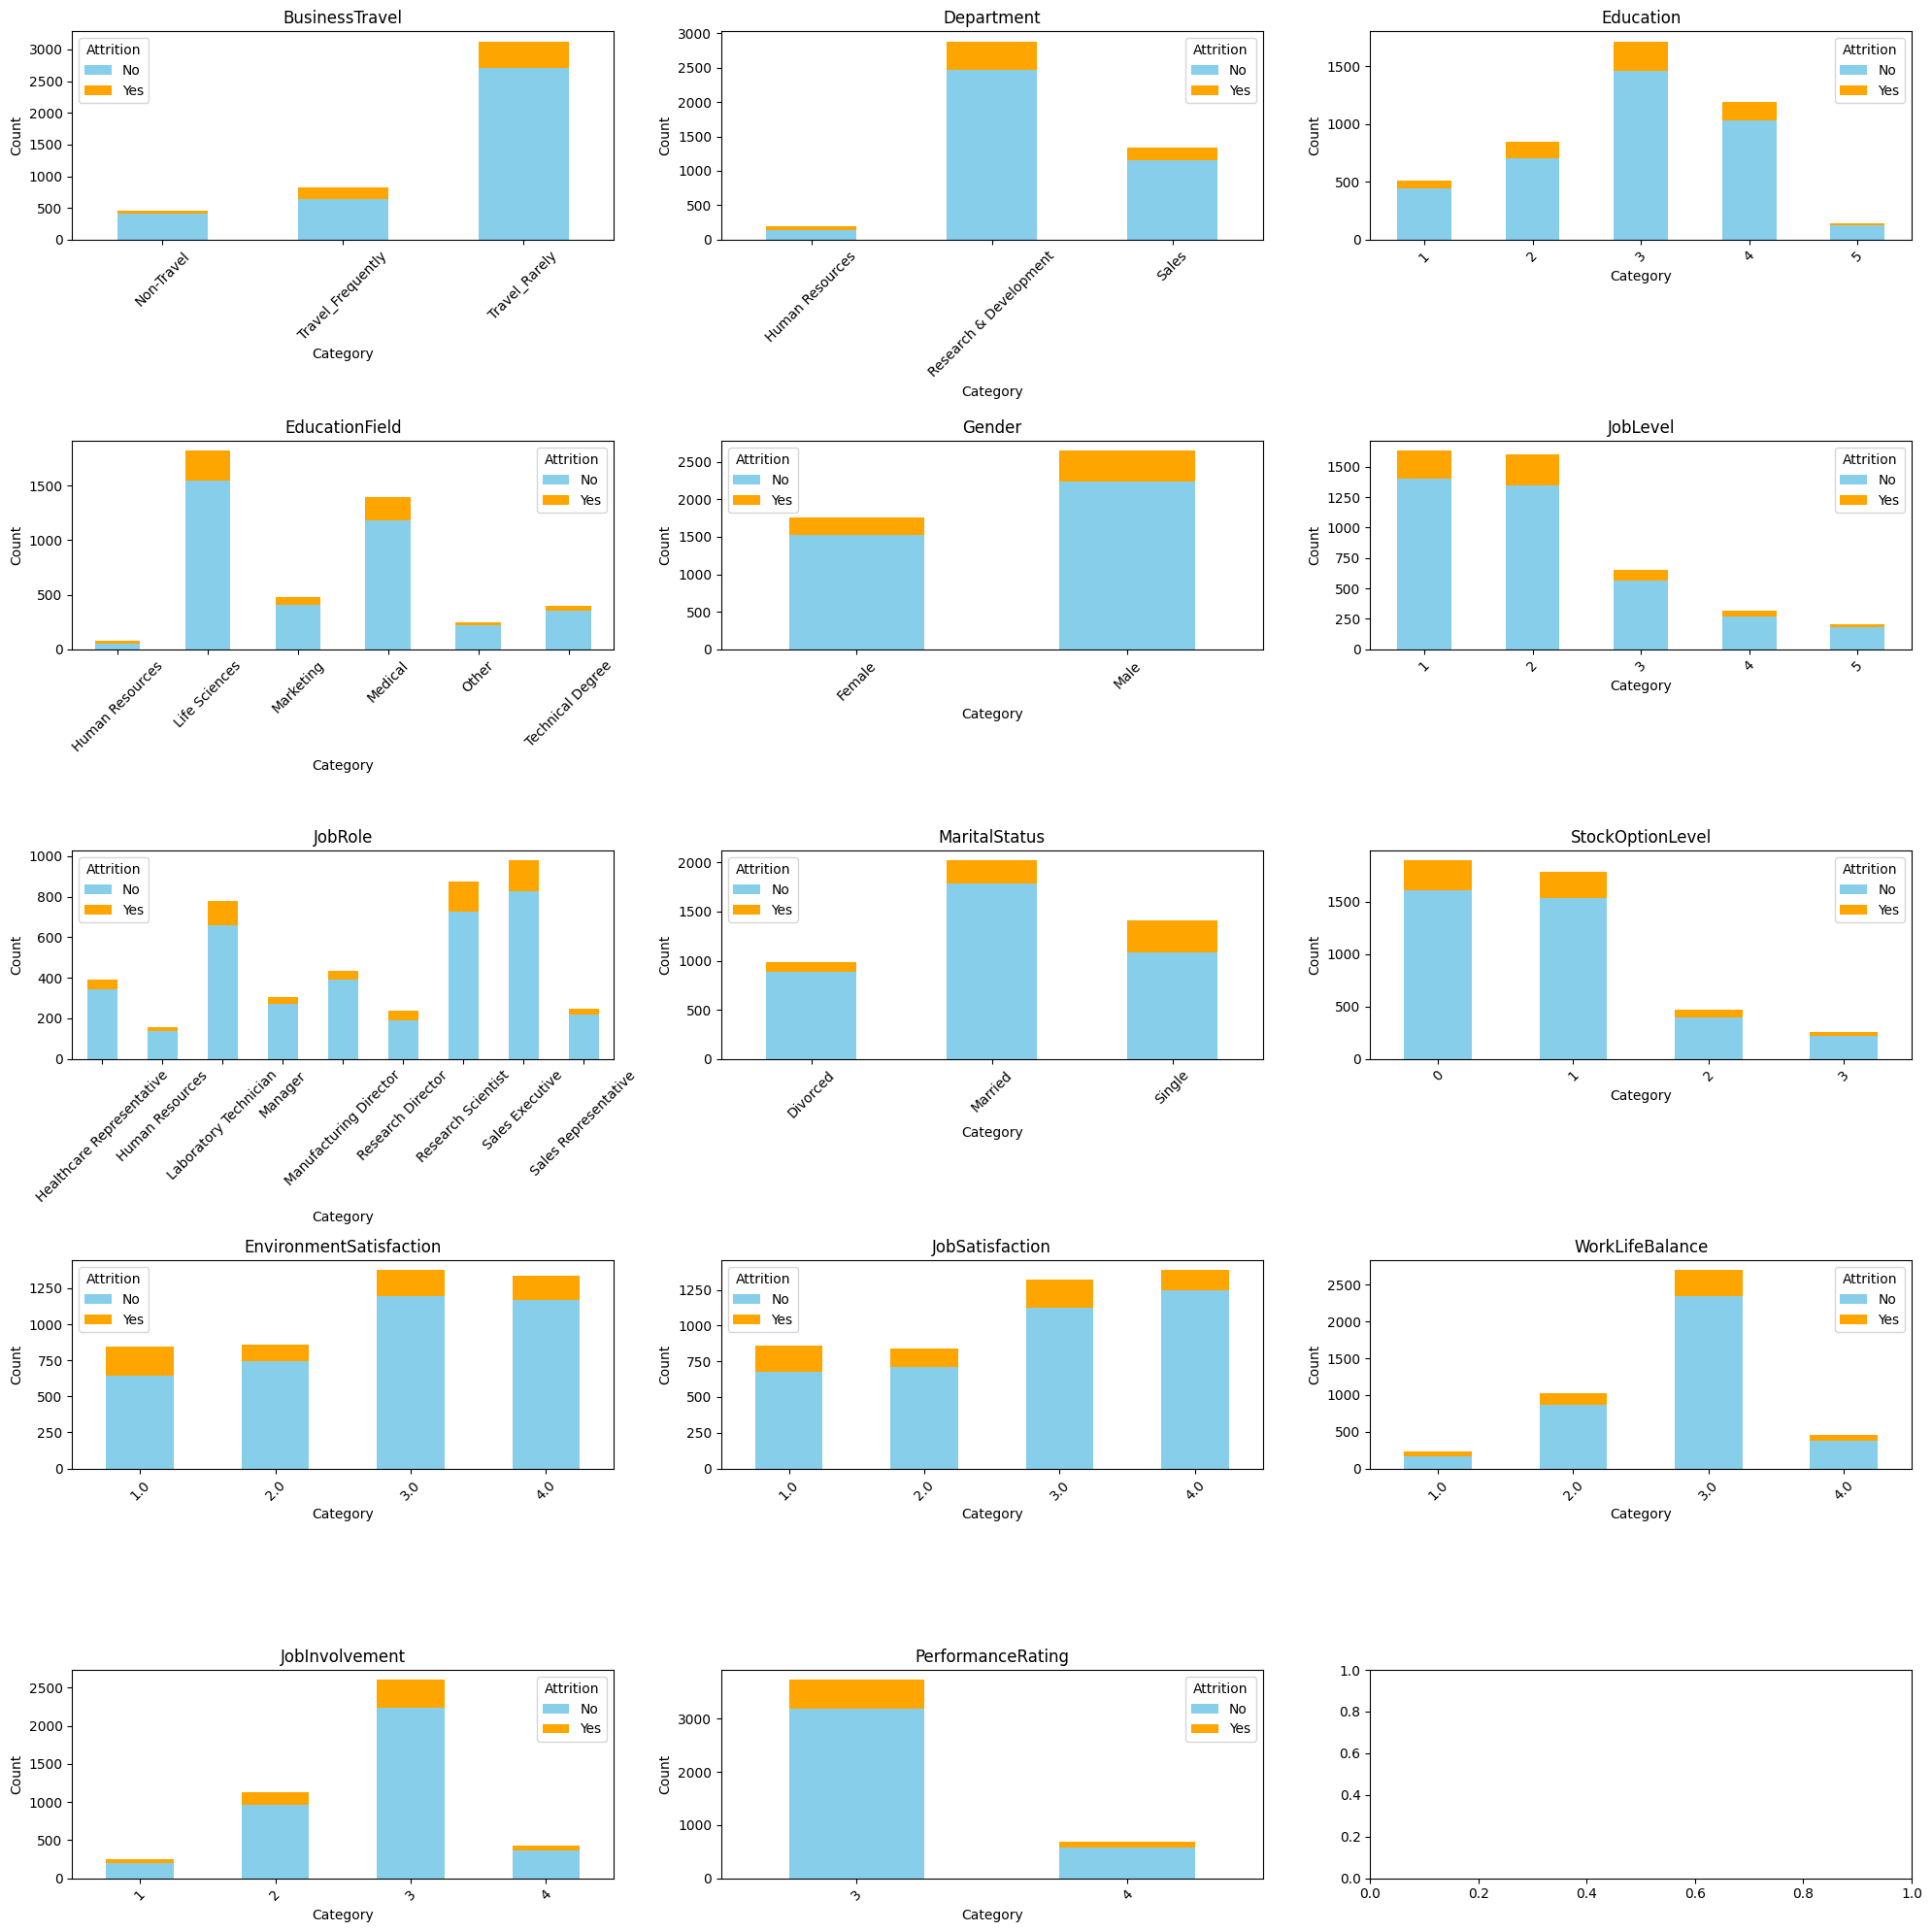

In [ ]:
# Definir el número de filas y columnas para los subplots
num_rows = 5
num_cols = 3

# Crear una figura y ejes de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Aplanar los ejes de los subplots para facilitar el bucle
axes = axes.flatten()

# Iterar sobre las variables categóricas y trazar gráficos de barras apiladas
for i, col in enumerate(var_cat.columns):
    ax = axes[i]
    crosstab = pd.crosstab(var_cat[col], df2015['Attrition'])
    crosstab.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'orange'])
    ax.set_title(col)
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Attrition')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()


En el gráfico anterior se puede observar la relación de la variable attrition con cada una de las variables categóricas, teniendo en cuenta que la altura de las barras corresponde a la cantidad de empleados en cada una de las categorías para cada variable, mientras que los colores indican la proporción de empleados que se retiran (naranja) y los que se quedan (azul) para cada una de las categorías.

##Exploración de variables numéricas

In [ ]:
var_num = pd.DataFrame(df2015[['Age', 'DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears',
                               'TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']].astype(float))

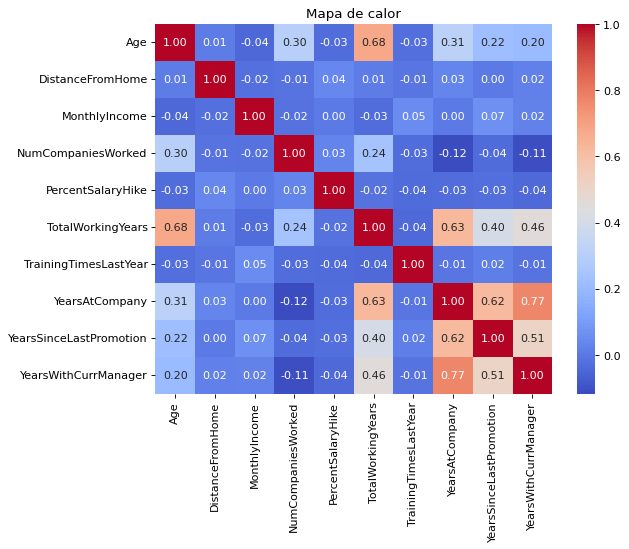

In [ ]:
# Calcula la matriz de correlación.
matriz_correlacion = var_num.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de calor")
plt.show()

Correlaciones altas entre las variables que representan informacion en años.

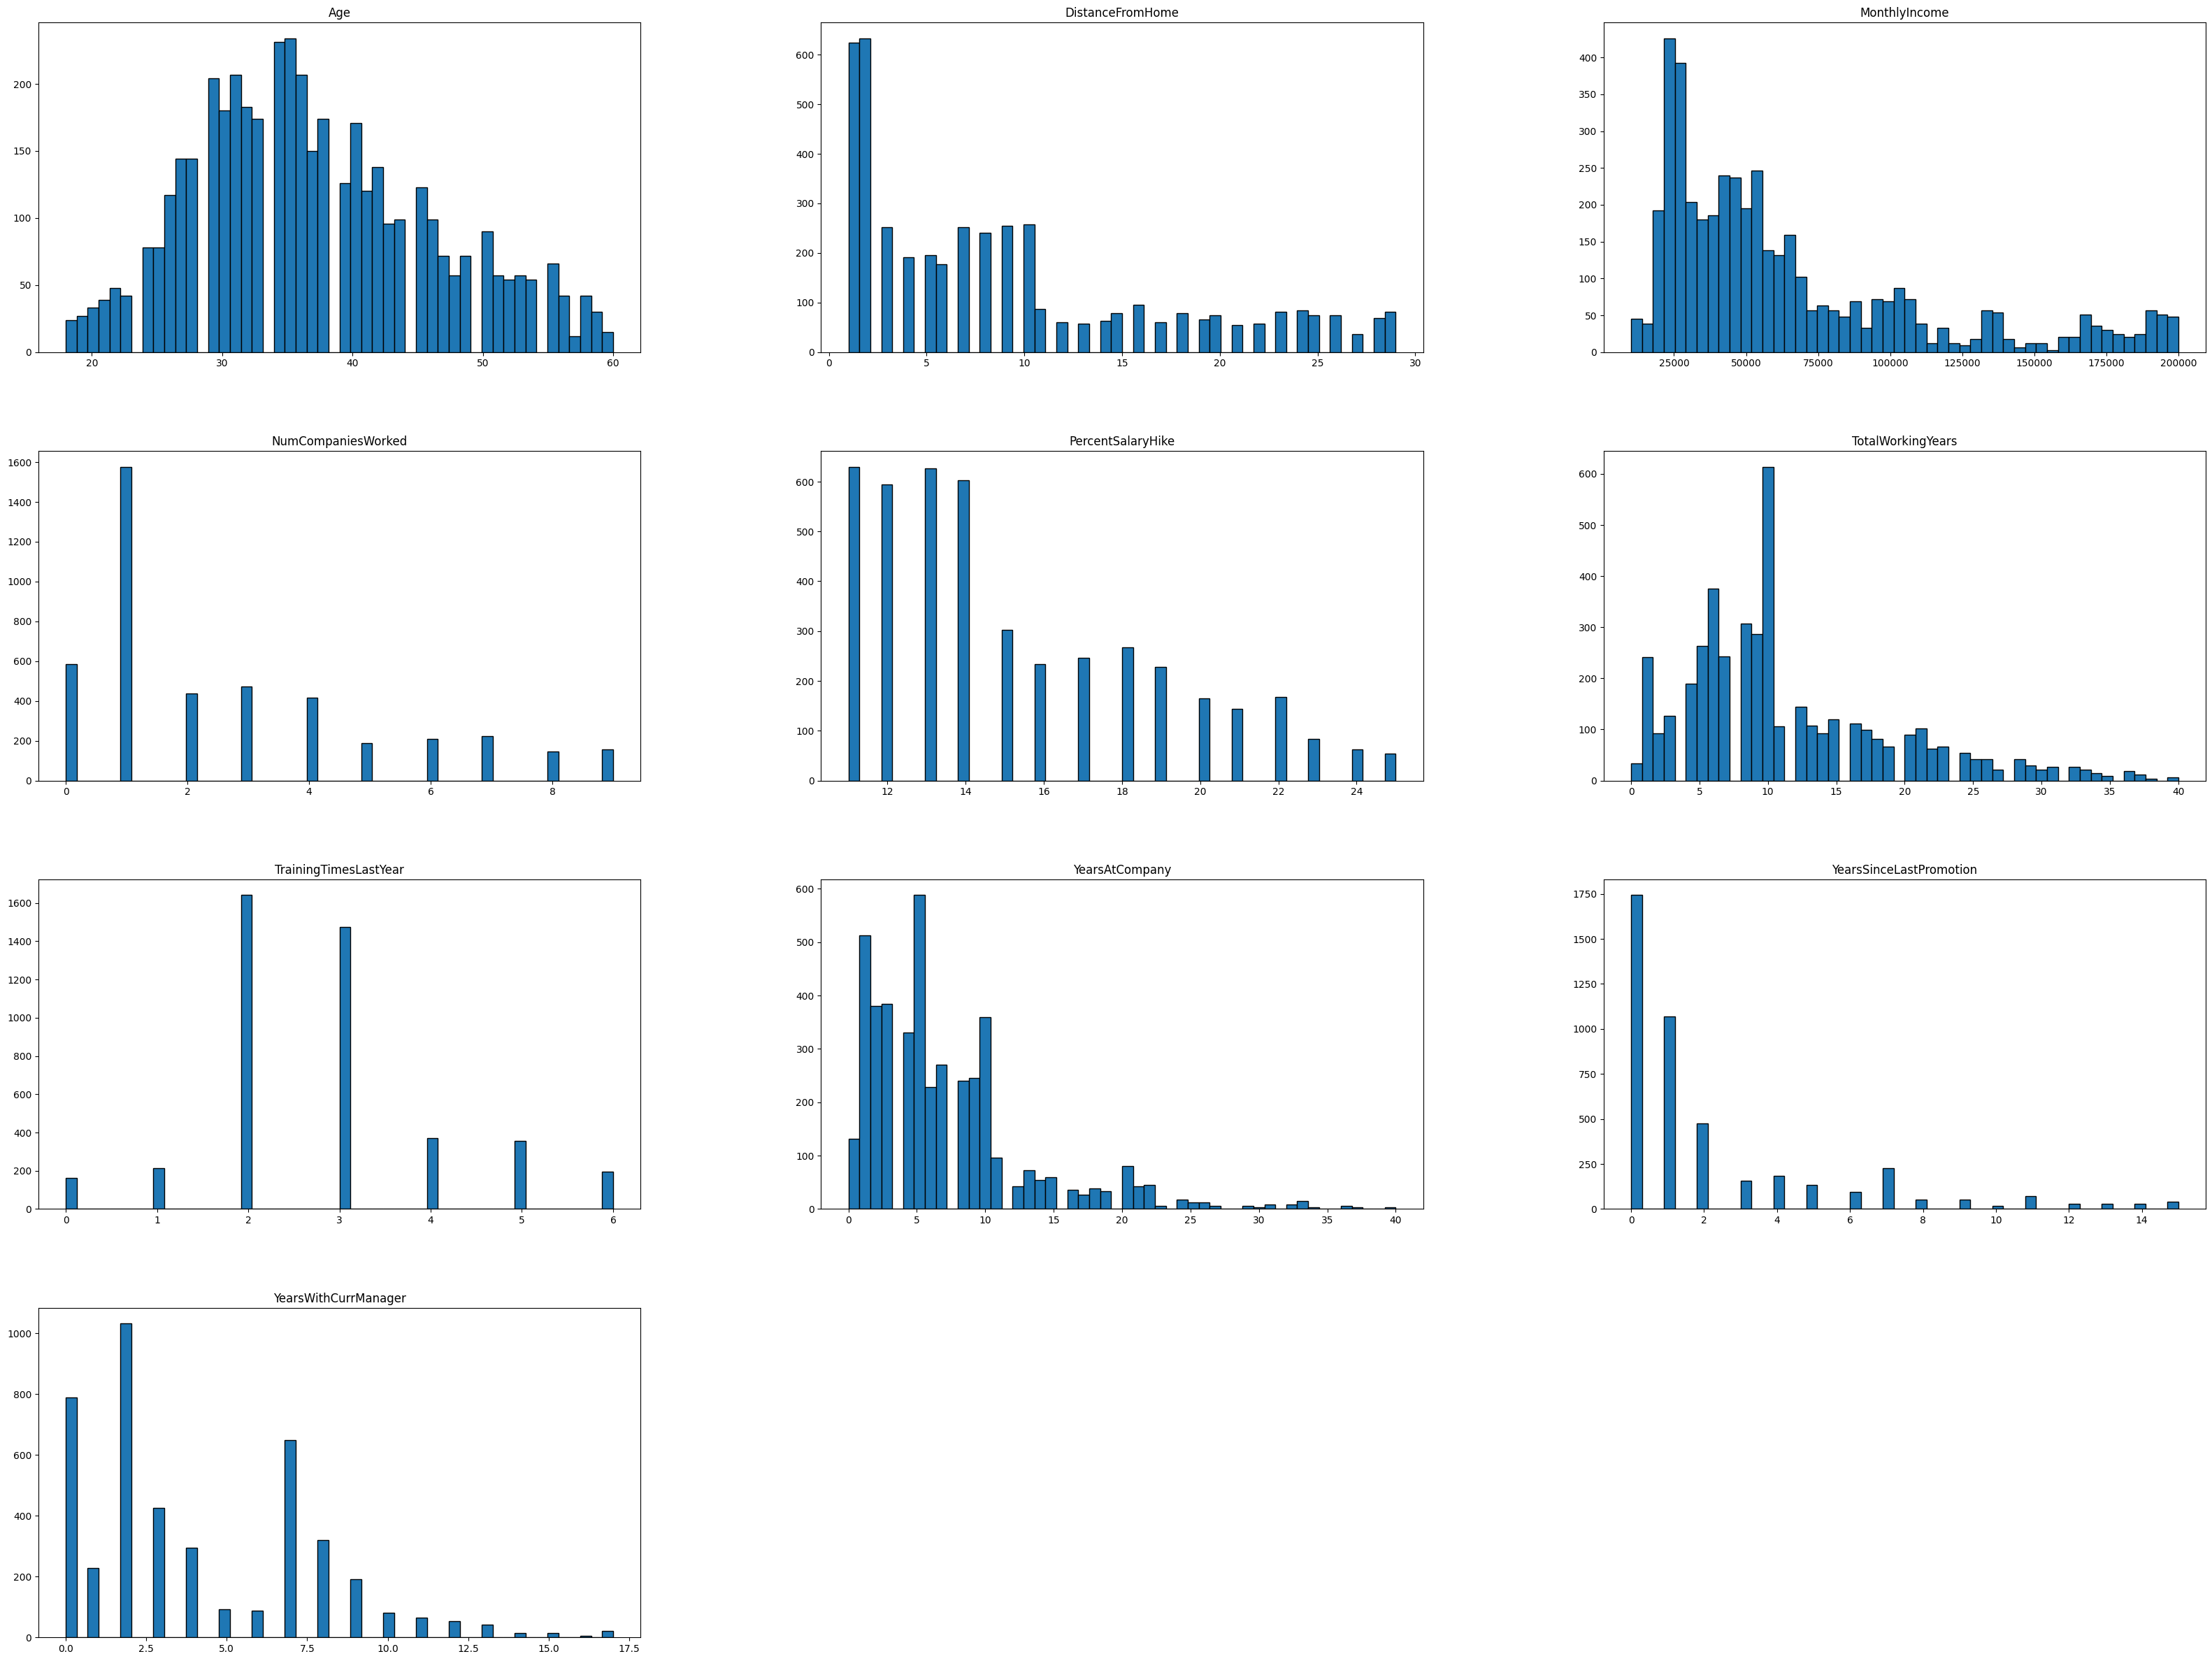

In [ ]:
####explorar variables numéricas con histograma
fig=var_num.hist(bins=50, figsize=(40,30),grid=False,ec='black')
plt.show()

En esta gráfica podemos observar el comportamiento de las variables númericas, como se puede ver se comportan algunas variables de manera normal y otras obtienen cierto sesgo a la izquierda, procederemos a tarbajar con algunas de ellas a ver como se comportan en el modelo.

## Exploracion de variable respuesta

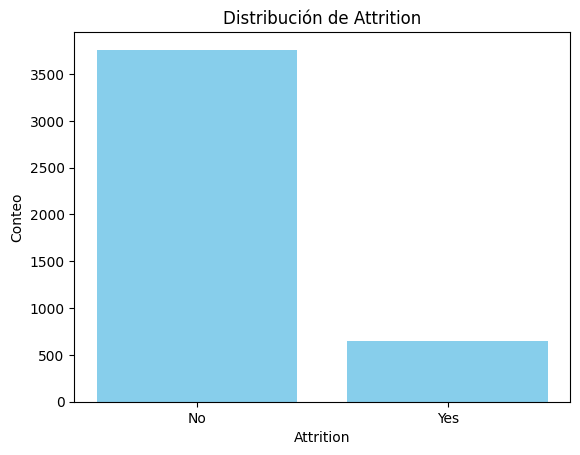

In [ ]:
# Calcular el conteo de valores de 'Attrition'
conteo_attrition = df2015['Attrition'].value_counts()

# Crear un gráfico de barras utilizando Matplotlib
plt.bar(conteo_attrition.index, conteo_attrition.values, color='skyblue')  # Crear gráfico de barras
plt.title('Distribución de Attrition')  # Título
plt.xlabel('Attrition')  # Etiqueta del eje x
plt.ylabel('Conteo')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico


Como pueden ver en la variable respuesta, el número de retirados es menor al de no retirados, por eso se veían los nulos al momento de ver la información de las bases de datos.

#Convertir variables a dummies

In [ ]:
#Hacer una copia para las dummies
df_dummies2015 = df2015.copy()

In [ ]:
# Identificar las columnas categóricas
cat_2015 = df_dummies2015.select_dtypes(include=['object']).columns

# Iterar a través de las columnas categóricas y mostrar las categorías únicas
for column in cat_2015:
    unique_categories = df_dummies2015[column].unique()
    print(f'Categorías en "{column}": {unique_categories}')

Categorías en "BusinessTravel": ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Categorías en "Department": ['Sales' 'Research & Development' 'Human Resources']
Categorías en "EducationField": ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Categorías en "Gender": ['Female' 'Male']
Categorías en "JobRole": ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
Categorías en "MaritalStatus": ['Married' 'Single' 'Divorced']
Categorías en "Attrition": ['No' 'Yes']


In [ ]:
# 2015
# Crear un objeto LabelEncoder
le = LabelEncoder()

# Iterar a través de las columnas categóricas y aplicar LabelEncoder si hay 2 categorías
for column in cat_2015:
    if len(df_dummies2015[column].unique()) == 2:  # Verificar si hay solo 2 categorías
       df_dummies2015[column] = le.fit_transform(df_dummies2015[column])

# Variables con mas de 2 categorias
df_dummies_2015 = pd.get_dummies(df_dummies2015)

In [ ]:
df_dummies_2015

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,0,1,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,31,10,1,0,1,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,32,17,4,1,4,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,38,2,5,1,3,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,32,10,1,1,1,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,4,0,1,60290,3.0,17,1,10.0,5,3,0,2,4.0,1.0,3.0,3,3,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4406,29,2,4,1,1,26790,2.0,15,0,10.0,2,3,0,2,4.0,4.0,3.0,2,3,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4407,25,25,2,1,2,37020,0.0,20,0,5.0,4,4,1,2,1.0,3.0,3.0,3,4,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4408,42,18,2,1,1,23980,0.0,14,1,10.0,2,9,7,8,4.0,1.0,3.0,2,3,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
df_dummies_2016

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,0,1,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,31,10,1,0,1,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,32,17,4,1,4,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,38,2,5,1,3,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,32,10,1,1,1,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,4,0,1,60290,3.0,17,1,10.0,5,3,0,2,4.0,1.0,3.0,3,3,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4406,29,2,4,1,1,26790,2.0,15,0,10.0,2,3,0,2,4.0,4.0,3.0,2,3,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4407,25,25,2,1,2,37020,0.0,20,0,5.0,4,4,1,2,1.0,3.0,3.0,3,4,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4408,42,18,2,1,1,23980,0.0,14,1,10.0,2,9,7,8,4.0,1.0,3.0,2,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
# Especificar la ruta de la carpeta donde deseas guardar el archivo CSV en Google Drive
carpeta_destino = '/content/drive/MyDrive/trabajo/Trabajo-analitica-RH/data/'
# Guardar el DataFrame como un archivo CSV en la carpeta de destino
df_dummies_2015.to_csv(carpeta_destino + 'df2015.csv', index=False)

In [ ]:
# Especificar la ruta de la carpeta donde deseas guardar el archivo CSV en Google Drive
carpeta_destino = '/content/drive/MyDrive/trabajo/Trabajo-analitica-RH/data/'
# Guardar el DataFrame como un archivo CSV en la carpeta de destino
df_dummies_2016.to_csv(carpeta_destino + 'df2016.csv', index=False)

#Exportar objetos

In [ ]:
### función para exportar y guardar objetos de python (cualqueira)
joblib.dump(df_dummies_2015,"/content/drive/MyDrive/trabajo/Trabajo-analitica-RH/salidas/df_dummies_2015.pkl")  ### para convertir a dummies
joblib.dump(df_dummies_2016,"/content/drive/MyDrive/trabajo/Trabajo-analitica-RH/salidas/df_dummies_2016.pkl")  ### para convertir a dummies
joblib.dump(var_cat,"/content/drive/MyDrive/trabajo/Trabajo-analitica-RH/salidas/var_cat.pkl") ### para realizar imputacion

['/content/drive/MyDrive/trabajo/Trabajo-analitica-RH/salidas/var_cat.pkl']

Se crean archivos que son exportados a la carperta del repositorio, que contienen las variables categoricas, las dummies de la data 2015 y las "dummies" de la data 2016.
